#     IMAGE CLASSIFICATION USING FASHION-MNIST DATASET 

In [5]:
# Importing packages and dataset into the workspace
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from sklearn.model_selection import GridSearchCV, ShuffleSplit, train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report 
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Exploratory data analysis

(60000, 28, 28)
(10000, 28, 28)
Train label 0 count :6000
Test label 0 count :1000
Train label 1 count :6000
Test label 1 count :1000
Train label 2 count :6000
Test label 2 count :1000
Train label 3 count :6000
Test label 3 count :1000
Train label 4 count :6000
Test label 4 count :1000
Train label 5 count :6000
Test label 5 count :1000
Train label 6 count :6000
Test label 6 count :1000
Train label 7 count :6000
Test label 7 count :1000
Train label 8 count :6000
Test label 8 count :1000
Train label 9 count :6000
Test label 9 count :1000


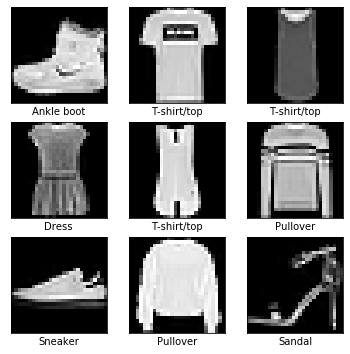

In [6]:
# Getting the dimension of the training and testing sets for images and labels. The first value represents the sample size, 
# while the next values will represent dimensions of the array.
print(train_images.shape)
print(test_images.shape)

# We notice that the labels are given without explaining which clothes they are supposed to represent. Therefore, we make a list 
# that will store the item names

label_names = ['T-shirt/top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# Now, let us normalize the array values

train_images = train_images/np.float32(255)
test_images = test_images/np.float32(255)

# For classification purposes in python, it will be much better to convert our 2d array into a 1d array, filling in row by row.
# Then we turn our flattened array into a numpy array object. 
def convert(nparray):
    l=[]
    dims=nparray.shape
    for i in range(dims[0]):
        l.append(nparray[i].flatten())
    l=np.array(l)
    return l
train_images_mod = convert(train_images)
test_images_mod  = convert(test_images)

# We check the distribution of labels

for i in range(10):
    print ('Train label ' + str(i) + ' count :' + str(len([j for j in train_labels if j==i])))
    print ('Test label ' + str(i) + ' count :' + str(len([j for j in test_labels if j==i])))



# Before procesing further, let us plot some items and their corresponding classes.

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.gray()
    plt.imshow(train_images[i])
    plt.xlabel(label_names[train_labels[i]])
plt.savefig('image_examples.jpg')
plt.show()

## Dimensionality reduction - Principal Component Analysis

As our data is highly dimensional (784 dimensions), we will resort to the feature selection type of dimensionality reduction,
called principal component analysis. We will calculate first 40 principal components. Then we will make a scree plot, and find
the number of components that we are going to use in our calculations.

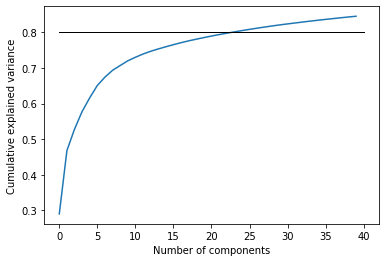

In [7]:
pca = PCA(n_components=40)
pca_fit = pca.fit_transform(train_images_mod)
variances = pca.explained_variance_ratio_

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.plot(np.cumsum(variances))
plt.plot([0,40],[0.8,0.8],'k-',lw=1)
plt.savefig('expained_variance.jpg')
plt.show()



From the plot, we see that the 80% of variance is captured between the before the 25th PC, so we will not work with more than 
that number of components. However, variance is expalined the most by the first eight PCs, so they will be included in the 
analysis as well.

##  Employing classification algorithms

### Convolutional neural network

In [13]:
# We will first reshape our data, in order to produce viable results. We will choose that our data has 1 channel, which signals
# that we have a grayscale image. The labels will be turned to categorical.

cnn_train       = train_images_mod.reshape(60000,28,28,1)
cnn_test        = test_images_mod.reshape(10000,28,28,1)
cnn_label_train = to_categorical(train_labels)
cnn_label_test  = to_categorical(test_labels)

# We will also introduce a validation set. In our case, it will be equal to 16% percent of the training set (closest to 10.000)
# points from the test set

cnn_train, cnn_train_val, cnn_label_train, cnn_label_train_val = train_test_split(cnn_train,cnn_label_train, test_size = 0.16, random_state = 2019)

# The model we will build is sequential, going layer by layer. It is also the easiest way to build a model in KERAS.

cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu' , kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128,activation = 'relu'))
cnn_model.add(Dense(10,activation='softmax'))
cnn_model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])

# Here, we are going to fit the model to our dataset.

cnn_model_training = cnn_model.fit(cnn_train,cnn_label_train,batch_size=64,epochs=50,verbose=1,
                           validation_data=(cnn_train_val,cnn_label_train_val))




Train on 50400 samples, validate on 9600 samples
Epoch 1/50
50400/50400 [==============================] - 113s 2ms/step - loss: 0.8831 - acc: 0.6730 - val_loss: 0.6789 - val_acc: 0.7450
Epoch 2/50
50400/50400 [==============================] - 106s 2ms/step - loss: 0.5941 - acc: 0.7733 - val_loss: 0.5386 - val_acc: 0.7977
Epoch 3/50
50400/50400 [==============================] - 106s 2ms/step - loss: 0.5159 - acc: 0.8064 - val_loss: 0.4917 - val_acc: 0.8246
Epoch 4/50
50400/50400 [==============================] - 105s 2ms/step - loss: 0.4753 - acc: 0.8243 - val_loss: 0.4671 - val_acc: 0.8330
Epoch 5/50
50400/50400 [==============================] - 105s 2ms/step - loss: 0.4437 - acc: 0.8369 - val_loss: 0.4326 - val_acc: 0.8413
Epoch 6/50
50400/50400 [==============================] - 105s 2ms/step - loss: 0.4201 - acc: 0.8458 - val_loss: 0.4393 - val_acc: 0.8363
Epoch 7/50
50400/50400 [==============================] - 105s 2ms/step - loss: 0.3967 - acc: 0.8534 - val_loss: 0.3891 - v

#### Plotting accuracies and losses of the CNN

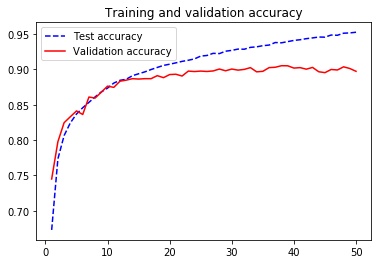

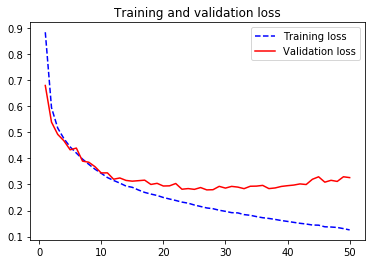

In [20]:
cnn_accuracy     = cnn_model_training.history['acc']
cnn_val_accuracy = cnn_model_training.history['val_acc']
loss             = cnn_model_training.history['loss'] 
val_loss         = cnn_model_training.history['val_loss']
epochs = [i for i in range (1,51)]

plt.plot(epochs, cnn_accuracy, 'b--', label = 'Test accuracy')
plt.plot(epochs, cnn_val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.savefig('Accuracy values')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b--', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('Loss values')
plt.show()



##### Remarks about the model

From the figures above, we see that the model is performing well. We see that the dataset becomes learned around the 15th epoch, because the validation accuracy from the on hovers around 0.90.  We will now evaluate the model on the training set.

In [ ]:
accuracy = cnn_model.evaluate(cnn_test,cnn_label_test,verbose=1)
print('The accuracy of CNN is equal to : ' + str(accuracy[1]))

### Multinomial logistic regression

Second approach that we will use to analyze our dataset is Multinomial logistic regression. We will use the lasso and regularisation, and compare results obtained using them. We will perform it both on principal components. We will use the pipeline approach with 25 PCs. Approach that will be used is One-Vs-Rest approach, which trains K binary classifiers, where K is the number of classes. Pipeline is tool in sklearn that enables us to combine in one step the transformations of data, and the final estimator.

In [8]:
pipe_log_reg_l2 = Pipeline([('pca',PCA(n_components=25)),('clf',LogisticRegression(multi_class='ovr',penalty='l2',solver='saga'))])
pipe_log_reg_l2.fit(train_images_mod,train_labels)
pred_labels_pipe_log_reg_l2 = pipe_log_reg_l2.predict(test_images_mod)
test_acc_pipe_l2 = accuracy_score(pred_labels_pipe_log_reg_l2,test_labels)
print('Test accuracy of logistic regression on 25 PCs with l2 penalty : ' + str(test_acc_pipe_l2))


C:\Users\lsvab\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test accuracy of logistic regression on 25 PCs with l2 penalty : 0.7979


### K-nearest neighbors and Nearest centroid

K-nearest neighbors algorithm will be implemented with respect to L1 and L2 distances on the 12 neighbors. We choose 12 neighbors, in order to avoid overfitting. We introduce the nearest centroid as well, in order to see if elements of the same class are clustered around some mean value.

In [14]:
# 12 nearest neighbors with respect to L1 distance

knn_L1 = KNeighborsClassifier(n_neighbors=12,metric='manhattan')
knn_L1.fit(train_images_mod,train_labels)
knn_L1_pred_test_labels    = knn_L1.predict(test_images_mod)
knn_L1_test_acc            = accuracy_score(knn_L1_pred_test_labels,test_labels)
print('Test accuracy for 12-nearest neighbors with L1 metric is equal to :' + str(knn_L1_test_acc))

# 12 nearest neighbors with respect to L2 distance

knn_L2 = KNeighborsClassifier(n_neighbors=12,metric='euclidean')
knn_L2.fit(train_images_mod,train_labels)
knn_L2_pred_test_labels    = knn_L2.predict(test_images_mod)
knn_L2_test_acc            = accuracy_score(knn_L2_pred_test_labels,test_labels)
print('Test accuracy for 12-nearest neighbors with L2 metric is equal to :' + str(knn_L2_test_acc))

# K-nearest centroids with respect to L1 distance from the nearest centroid

knc_L1 = NearestCentroid(metric='manhattan')
knc_L1.fit(train_images_mod,train_labels)
knc_L1_pred_test_labels = knc_L1.predict(test_images_mod)
knc_L1_test_acc = accuracy_score(knc_L1_pred_test_labels,test_labels)
print('Test accuracy for k-nearest centroids is equal to :' + str(knc_L1_test_acc))

# K-nearest centroids with respect to L2 distance from the nearest centroid

knc_L2 = NearestCentroid(metric='euclidean')
knc_L2.fit(train_images_mod,train_labels)
knc_L2_pred_test_labels = knc_L2.predict(test_images_mod)
knc_L2_test_acc = accuracy_score(knc_L2_pred_test_labels,test_labels)
print('Test accuracy for k-nearest centroids is equal to :' + str(knc_L2_test_acc))






Test accuracy for 12-nearest neighbors with L1 metric is equal to :0.8568
Test accuracy for 12-nearest neighbors with L2 metric is equal to :0.8471
Test accuracy for k-nearest centroids is equal to :0.6567
Test accuracy for k-nearest centroids is equal to :0.6768


## Random forest

As the data given in form of images is not really useful for performing random forests, due to high number of features and 
their collinearity, we will resort to the use of principal components to distinguish our data. We will use the first 25
principal components in order to select our data. We use the Grid search to select best hyperparameters.

In [3]:
par_rf = {'rf__n_estimators':[200],'rf__max_features':['sqrt',25],'rf__criterion':['gini','entropy'],
          'rf__max_depth':[5,6],'rf__min_samples_split':[100],'rf__bootstrap':[True]}
pipe_rf = Pipeline([('pca', PCA(n_components=25)),
                    ('rf', RandomForestClassifier())])
rf_grid = GridSearchCV(pipe_rf,cv=5,param_grid=par_rf,refit=False,scoring='accuracy',verbose=3)
rf_grid.fit(train_images_mod,train_labels)
print(rf_grid.best_params)

        
    


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__min_samples_split=100, rf__n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__min_samples_split=100, rf__n_estimators=200, score=0.745, total=  31.2s
[CV] rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__min_samples_split=100, rf__n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.1s remaining:    0.0s


[CV]  rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__min_samples_split=100, rf__n_estimators=200, score=0.736, total=  31.1s
[CV] rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__min_samples_split=100, rf__n_estimators=200 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.0min remaining:    0.0s


[CV]  rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__min_samples_split=100, rf__n_estimators=200, score=0.741, total=  30.8s
[CV] rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__min_samples_split=100, rf__n_estimators=200 
[CV]  rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__min_samples_split=100, rf__n_estimators=200, score=0.737, total=  31.1s
[CV] rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__min_samples_split=100, rf__n_estimators=200 
[CV]  rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__min_samples_split=100, rf__n_estimators=200, score=0.743, total=  30.9s
[CV] rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__max_features=25, rf__min_samples_split=100, rf__n_estimators=200 
[CV]  rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__max_features=25, rf__min_samples_split=100, rf_

[CV]  rf__bootstrap=True, rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__min_samples_split=100, rf__n_estimators=200, score=0.774, total= 2.3min
[CV] rf__bootstrap=True, rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__min_samples_split=100, rf__n_estimators=200 
[CV]  rf__bootstrap=True, rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__min_samples_split=100, rf__n_estimators=200, score=0.765, total= 2.3min
[CV] rf__bootstrap=True, rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__min_samples_split=100, rf__n_estimators=200 
[CV]  rf__bootstrap=True, rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__min_samples_split=100, rf__n_estimators=200, score=0.773, total= 2.3min
[CV] rf__bootstrap=True, rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__min_samples_split=100, rf__n_estimators=200 
[CV]  rf__bootstrap=True, rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__m

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 146.9min finished


AttributeError: 'GridSearchCV' object has no attribute 'best_params'

In [ ]:
print(rf_grid.best_params_)
print(rf_grid.best_score_)

pipe_rf_final = Pipeline([('pca', PCA(n_components=25)),
                        ('rf', RandomForestClassifier(n_estimators=200,bootstrap=True,min_samples_split=100,max_features='sqrt',max_depth=5))])
pipe_rf_final.fit(train_images_mod,train_labels)
new_labels_rf = pipe_pf_final.predict(test_images_mod,test_labels)
rf_accuracy = accuracy_score(test_labels,new_labels_rf)
print('The accuracy for Random Forest is equal to :' + str(rf_accuracy))

## Support vector machines

Due to high dimensionality of data, we should resort usa of PCs. We will select 25PCs, as they select an amount of variance with which we believe we can get satisfactory results. We will apply the rbf (Gaussian) and polynomial kernel.

In [8]:
# SVM with rbf kernel.

pipe_svm_1 = Pipeline([('pca', PCA(n_components=25)),('clf',SVC(C=100,kernel='rbf',gamma=0.1))])
pipe_svm_1.fit(train_images_mod,train_labels)
pipe_svm_1_pred_labels = pipe_svm_1.predict(test_images_mod)
pipe_svm_1_acc = accuracy_score(pipe_svm_1_pred_labels,test_labels)
print('The accuracy of SVM classifier with rbf kernel is equal to :' + str(pipe_svm_1_acc))

# SVM with polynomial kernel.

pipe_svm_2 = Pipeline([('pca', PCA(n_components=25)),('clf', SVC(C=100,kernel='poly',degree=5))])
pipe_svm_2.fit(test_images_mod,test_labels)
pipe_svm_2_pred_labels = pipe_svm_2.predict(test_images_mod)
pipe_svm_2_acc = accuracy_score(pipe_svm_2_pred_labels,test_labels)
print('The accuracy of SVM classifier with polynomial kernel of degree five is equal to :' + str(pipe_svm_2_acc))
        
    
  


The accuracy of SVM classifier with rbf kernel is equal to :0.7783


C:\Users\lsvab\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy of SVM classifier with polynomial kernel of degree three is equal to :0.4406


In [252]:
3//2

1